<a href="https://colab.research.google.com/github/shipra-saxena/miniature-potato/blob/master/Copy_of_6_Hierarchical_and_density_based_clustering_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised learning: Hierarchical and density-based clustering algorithms

In [0]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [0]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, [2, 3]] # Take only two columns out of 4 columns
y = iris.target
n_samples, n_features = X.shape
print(n_samples, n_features)
print(y) # There are three classes/three clusters should be there

150 2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


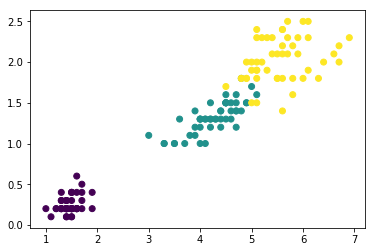

In [0]:
# Visulaize the data
plt.scatter(X[:, 0], X[:, 1], c=y)

## 2. Compute linkage (complete)

In [0]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

clusters = linkage(X, 
                   metric='euclidean',
                   method='complete')

## 3. Create dendrogram

Text(0, 0.5, 'Euclidean Distance')

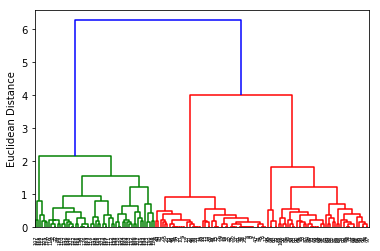

In [0]:
dendr = dendrogram(clusters)

plt.ylabel('Euclidean Distance')

## 4. Perform Agglomertive clustering

Next, let's use the `AgglomerativeClustering` estimator from scikit-learn and divide the dataset into 3 clusters. Can you guess which 3 clusters from the dendrogram it will reproduce?

In [0]:
from sklearn.cluster import AgglomerativeClustering

# Create agglomerative cluster object
ac = AgglomerativeClustering(n_clusters=3,
                             affinity='euclidean',
                             linkage='complete')

# Perform clustering
prediction = ac.fit_predict(X)
print('Cluster labels: %s\n' % prediction)

Cluster labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]



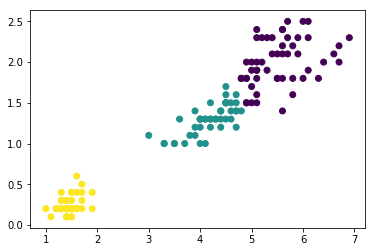

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=prediction)

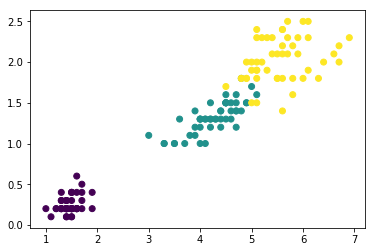

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y)

# Exercise

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
Given the text of teenagers' Social Networking Service (SNS) pages, identify groups that share common interests such as sports, religion, or music.
The data include:
   - 30,000 teenagers 
   - 4 variables indicating personal characteristics - gradyear, gender, age and friends 
   - 36 words indicating interests (basketball, football, soccer, etc).
Perform Agglomerative clustering and compare the results with the results of K-Means clustering.
      </li>
    </ul>
</div>

In [0]:
import pandas as pd
# load the CSV file as a dataframe
input_file = "snsdata.csv"

# comma delimited is the default
df = pd.read_csv(input_file, header = 0, delimiter = ",")

In [0]:
df.shape

In [0]:
df = df.dropna(subset=['gender'])
df.shape

In [0]:
df = df.drop(['gradyear', 'gender', 'age'], axis=1)

In [0]:
df_orig = df

In [0]:
def standardization(dataset):
    """ Standardization of numeric fields, where all values will have mean of zero 
    and standard deviation of one. (z-score)
    
    Args:
    dataset: A `Pandas.Dataframe` 
    """
    dtypes = list(zip(dataset.dtypes.index, map(str, dataset.dtypes)))
    #print(dtypes)
    # Normalize numeric columns.
    for column, dtype in dtypes:
        #if dtype == 'float32':
        dataset[column] -= dataset[column].mean()
        dataset[column] /= dataset[column].std()
    return dataset
df = standardization(df_orig)

In [0]:
df.head()